# Description

This notebook provides visualizations for solution cost changes depending on configuration.


## Preparation

Get best known solution sample test data stored in csv format:

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from extractors import *

sns.set(style="ticks")

df = pd.read_csv('../experiments/demo/out/best_known_solutions.csv')

## Test data set

Displays imported arrays of problem and config names:

In [2]:
get_problems(df)

array(['simple.delivery.1000', 'simple.reload.1000',
       'balance.delivery.1000', 'balance.delivery.100',
       'simple.reload.100', 'simple.multi-job.25', 'simple.multi-job.250',
       'simple.delivery.100'], dtype=object)

In [3]:
get_configs(df)

array(['no-aggressive-ruin', 'base', 'only-regret-recreate',
       'double-population', 'only-asr-ruin'], dtype=object)

# Cost variation vs Config

This visualization shows how different configuration influences solution's total cost:

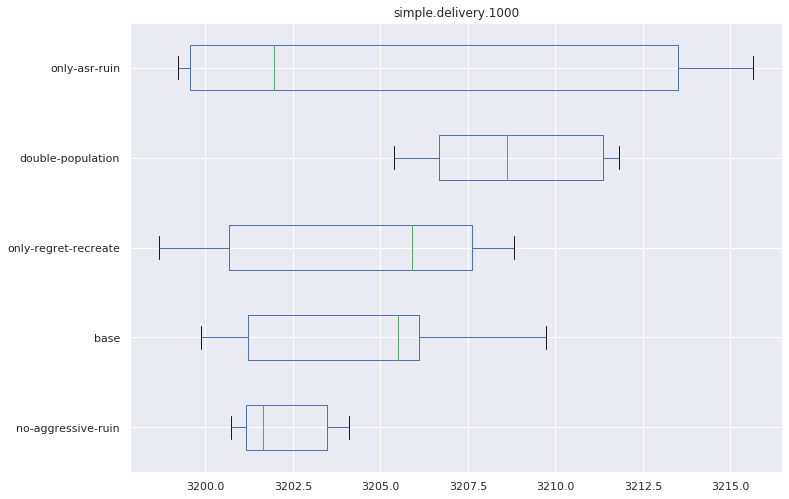

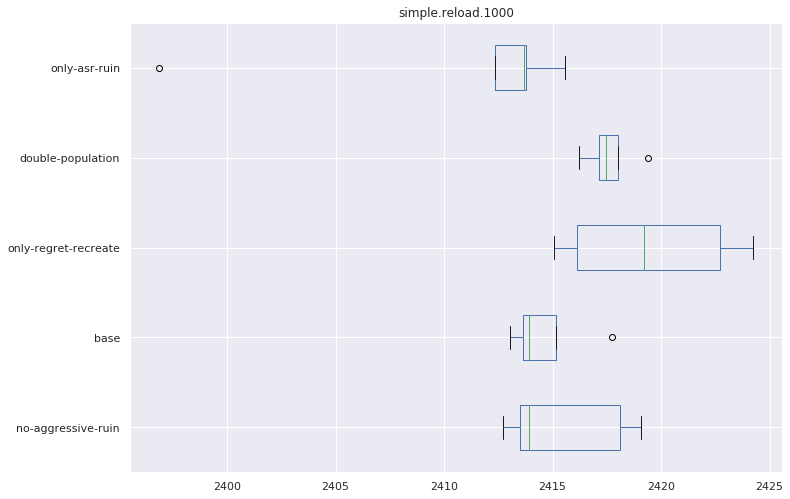

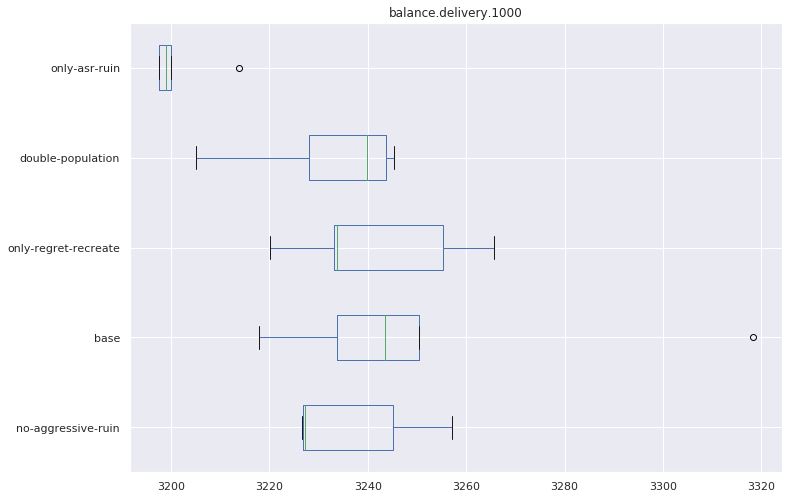

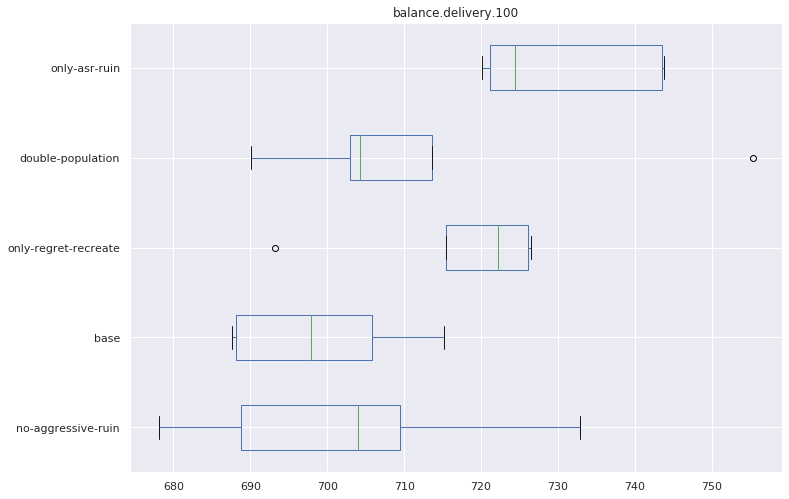

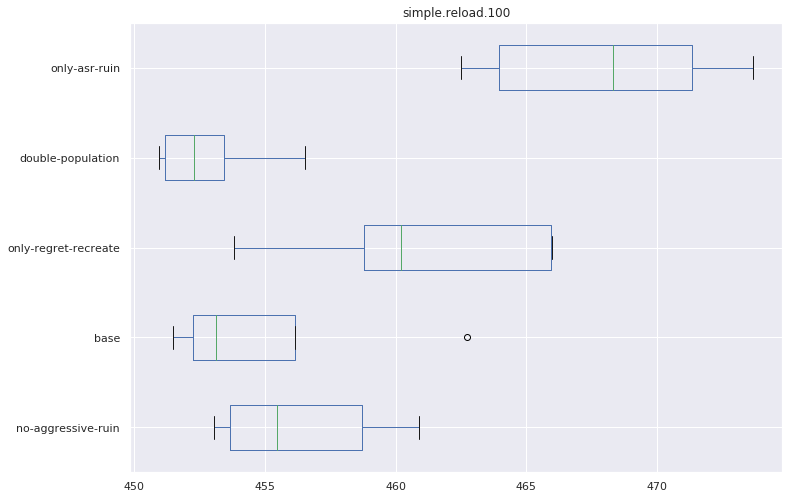

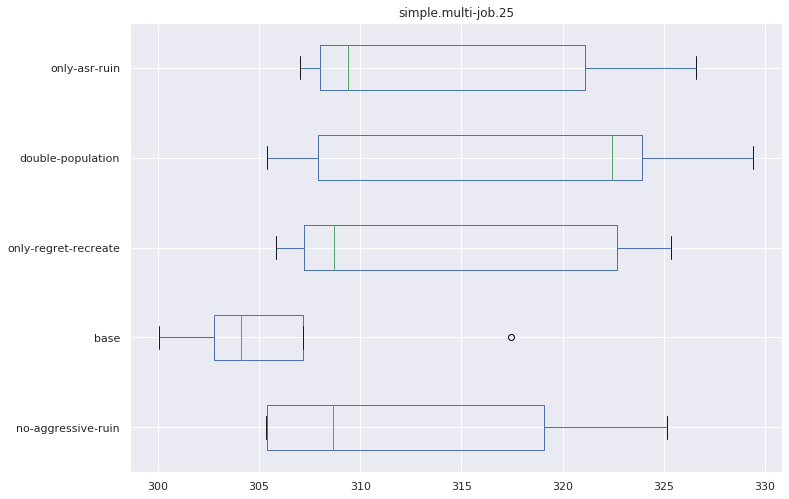

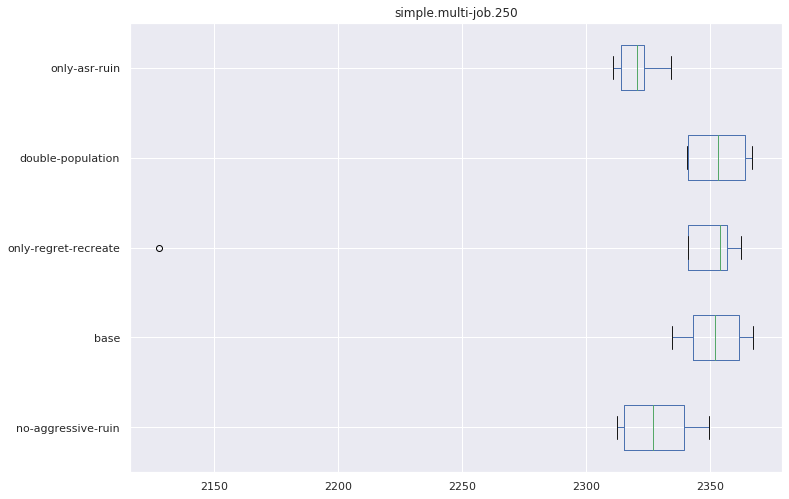

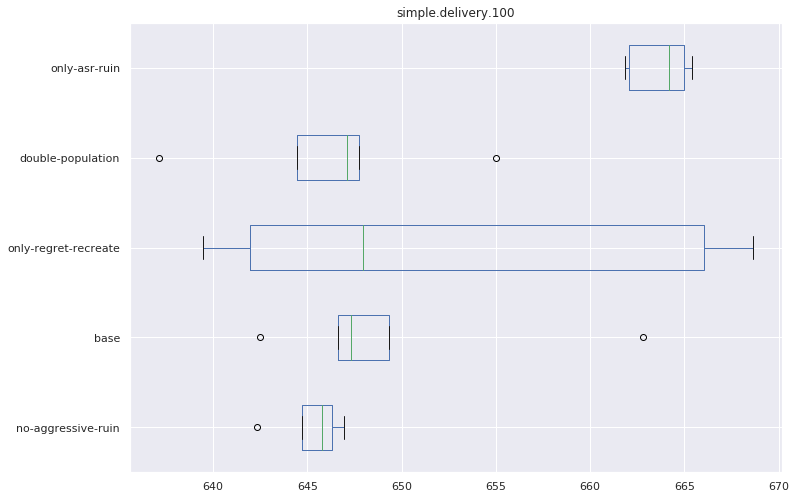

In [4]:
for problem in get_problems(df):
    columns = []
    for config in get_configs(df):
        columns.append(extract_columns(df, config_name = config, problem_name = problem, 
                                      target_columns = ['Cost'], new_labels=[config]))
    pd.concat(columns, axis = 1).plot(kind = 'box', title = problem, vert=False)

# Cost vs Duration

This visualization shows cost/duration changes:

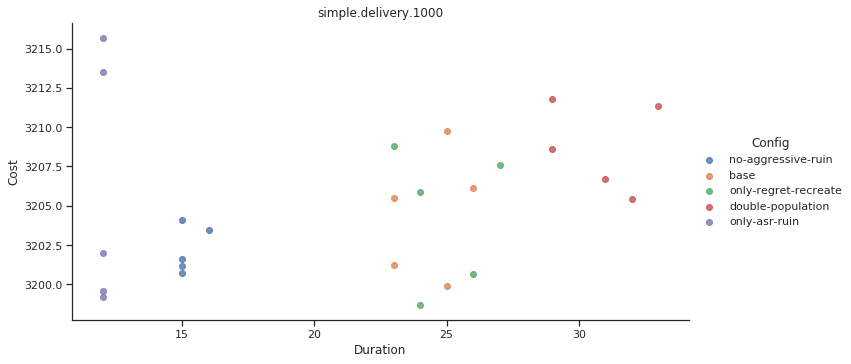

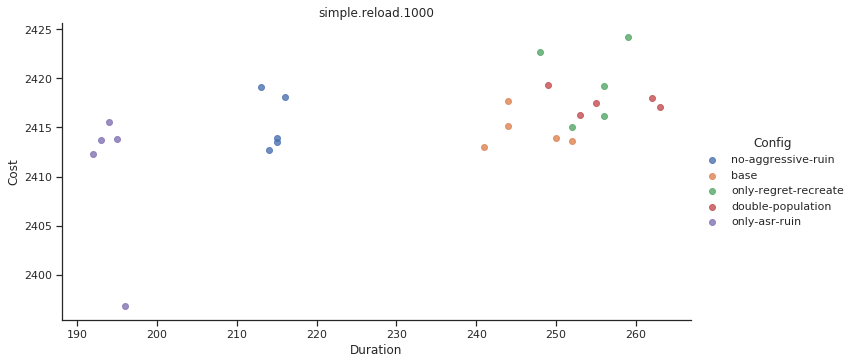

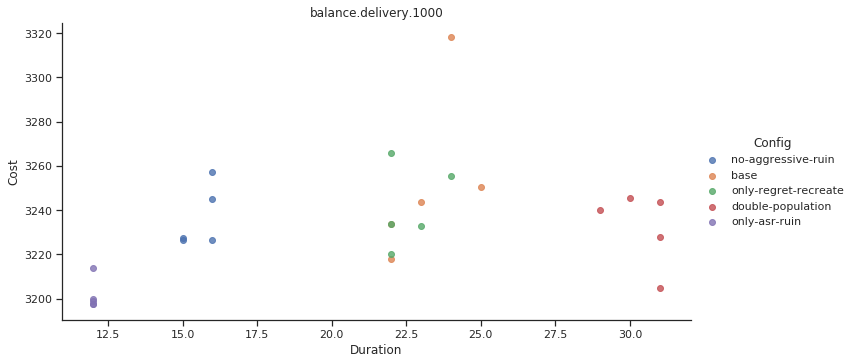

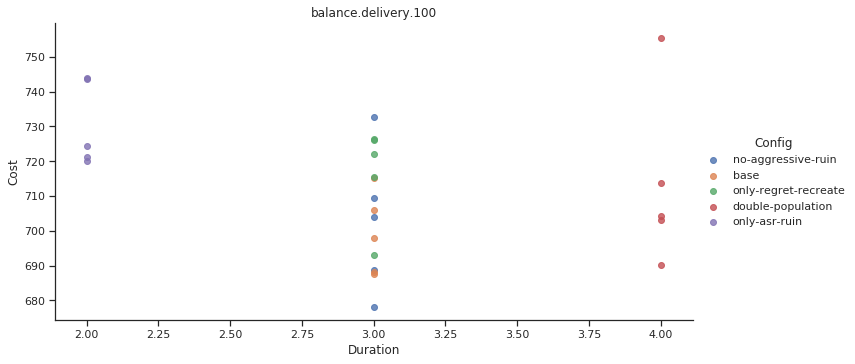

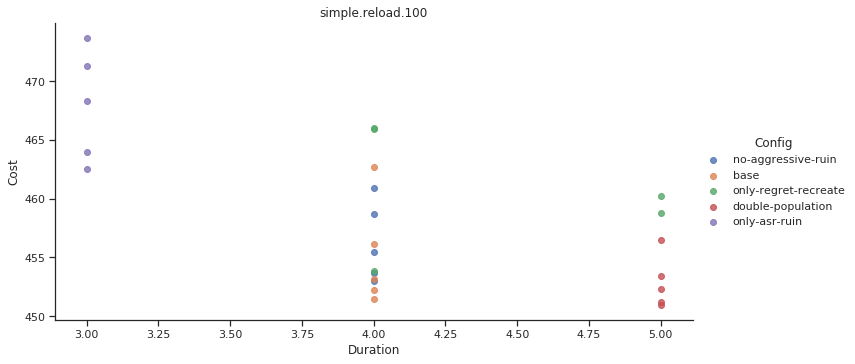

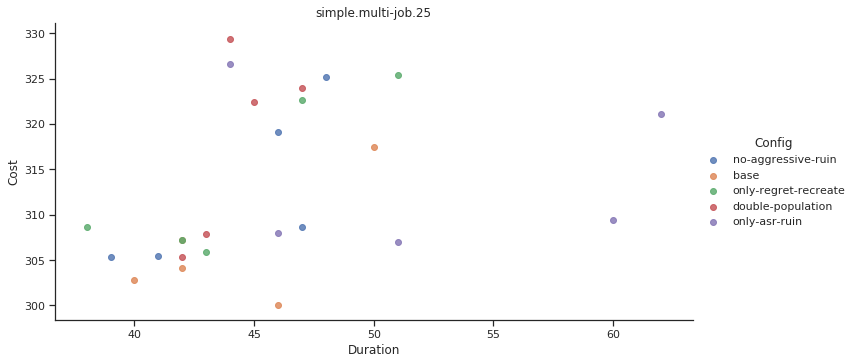

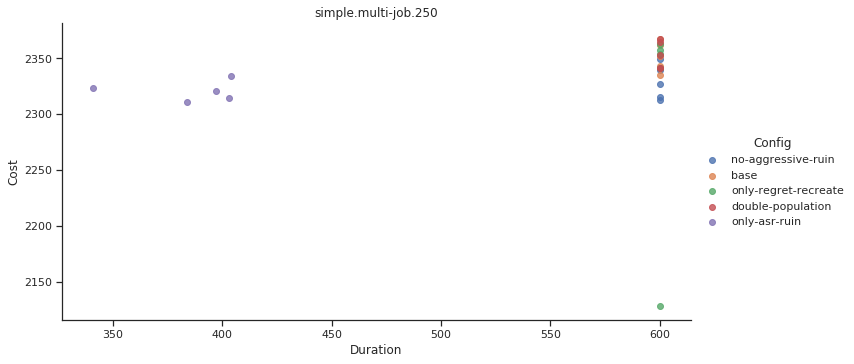

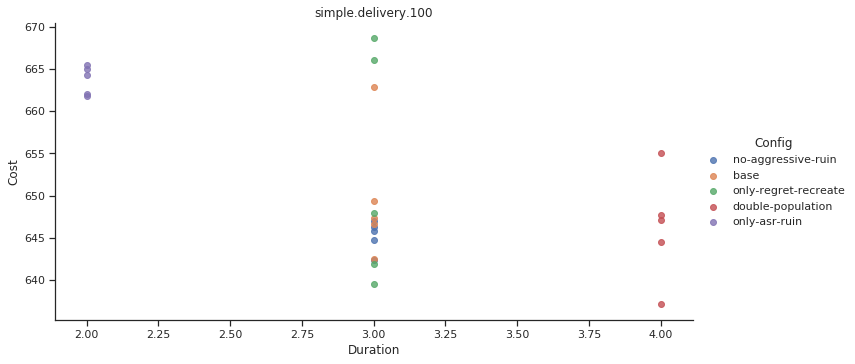

In [16]:
for problem in get_problems(df):
    columns = []
    configs = get_configs(df)
    for config in configs:
        column = extract_columns(df, config_name = config, problem_name = problem, 
                                 target_columns = ['Cost', 'Duration'], new_labels = ['Cost', 'Duration'])
        column['Config'] = config
        columns.append(column)   
    
    
    
    sns.lmplot(x='Duration', y='Cost', data=pd.concat(columns, axis = 0),
               fit_reg=False, hue='Config', height=5, aspect=2)
    plt.title(problem)


# Cost vs Generations

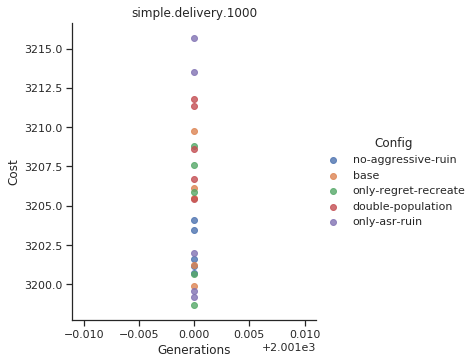

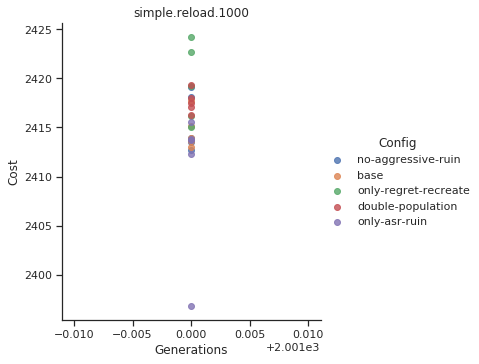

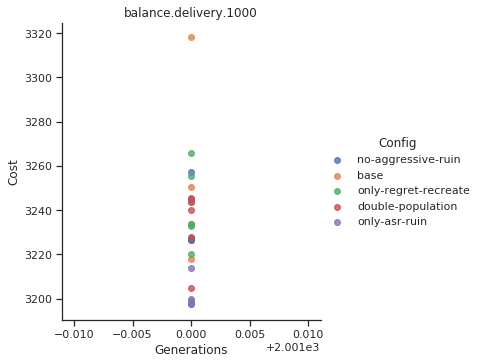

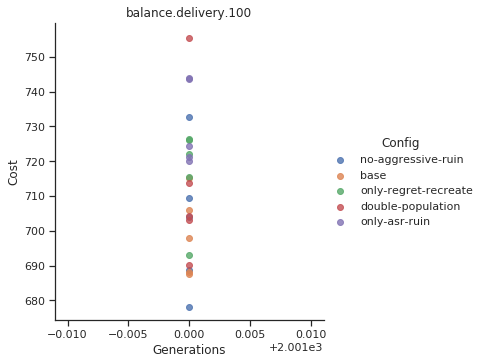

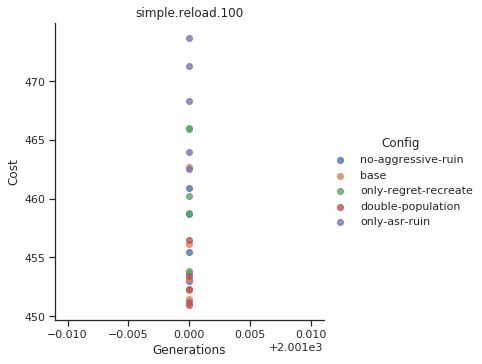

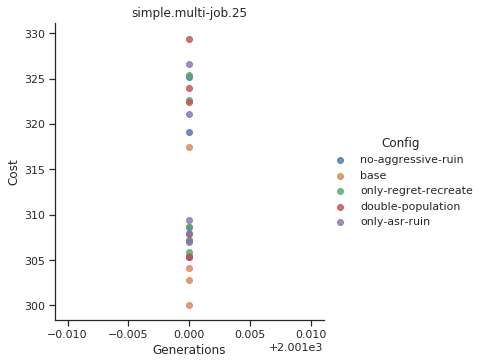

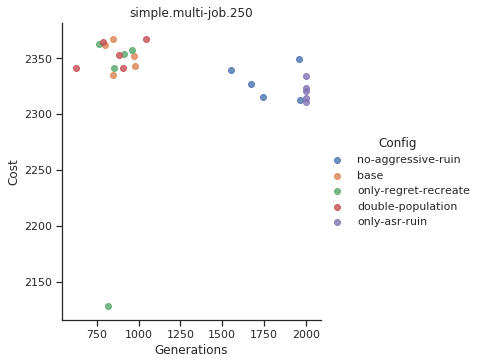

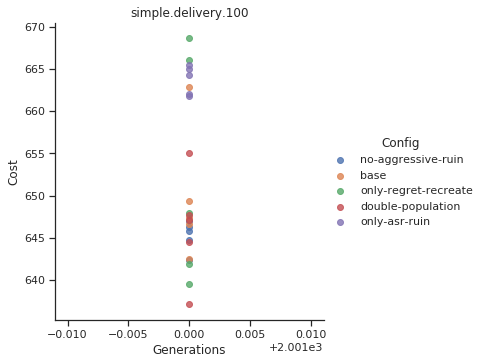

In [17]:
for problem in get_problems(df):
    columns = []
    configs = get_configs(df)
    for config in configs:
        column = extract_columns(df, config_name = config, problem_name = problem, 
                                 target_columns = ['Cost', 'Generations'], new_labels = ['Cost', 'Generations'])
        column['Config'] = config
        columns.append(column)   
    
    sns.lmplot(x='Generations', y='Cost', data=pd.concat(columns, axis = 0),
               fit_reg=False, hue='Config', height=5, aspect=2)
    plt.title(problem)